In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

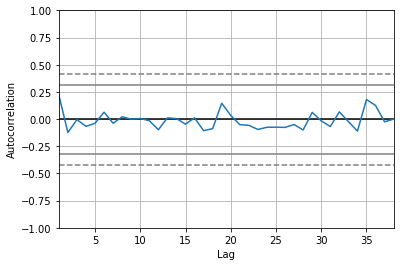

In [11]:
series = pd.read_csv('cluster_0_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   37
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -185.494
Method:                       css-mle   S.D. of innovations             35.567
Date:                Thu, 26 Sep 2019   AIC                            384.989
Time:                        21:53:13   BIC                            396.265
Sample:                             1   HQIC                           388.964
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7850      1.695     -0.463      0.646      -4.107       2.537
ar.L1.D.count    -0.5920      0.170     -3.481      0.002      -0.925      -0.259
ar.L2.D.count    -0.7710      0.191     

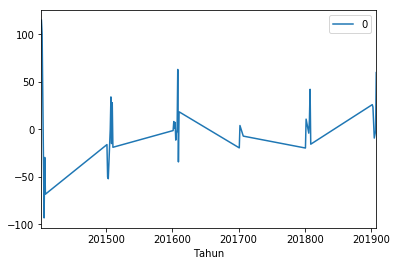

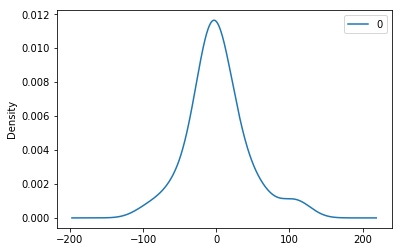

                0
count   37.000000
mean     2.151118
std     40.521154
min    -93.229625
25%    -16.058884
50%     -1.953642
75%     18.430303
max    114.784980


In [14]:
series = pd.read_csv('cluster_0_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=-2.276337, expected=2.000000
predicted=11.622763, expected=3.000000
predicted=15.304194, expected=4.000000
predicted=-4.911505, expected=11.000000
predicted=-0.893512, expected=1.000000
predicted=-7.939874, expected=7.000000
predicted=-1.602659, expected=46.000000
predicted=16.592982, expected=1.000000
predicted=-8.835035, expected=20.000000
predicted=12.546404, expected=45.000000
predicted=16.337481, expected=5.000000
predicted=7.782042, expected=3.000000
predicted=18.206209, expected=86.000000
Test MSE: 757.049


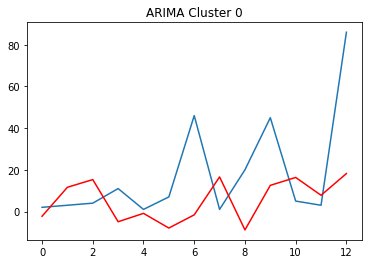

In [15]:
series = pd.read_csv('cluster_0_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.title("ARIMA Cluster 0")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()